# How to predict a good movie by not looking at the ratings?

### Zhanyi Tan, Rohit Mallidi 

![title](BeFunky Collage.png)

# Motivation

As millennials brought up in the technological revolution, we noticed that there are too many platforms that are fighting to steal our attention to make a quick buck. While this is the case with social media, online streaming services, news websites, etc., Movies are one of the main source of entertainment passed down to us from the last century. Movies let you immerse yourself and enjoy experiences without any disturbance and is still considered one of the best forms of storytelling.

In the past people would rely on the Oscars and Golden Globe award nominations in deciding if a movie was great or a masterpiece. Nowadays we usually resort to ratings on websites like IMDb and Rotten Tomatoes to decide on whether or not to watch a movie. We wanted to tackle a challenge of deciding if a movie is worth watching or not without relying on these website’s ratings. Our analysis uses the movie’s budget, genre, profit and year to predict if it is a good movie. Normally, the ginormous amount of data would take a lot of effort to analyze but with the advancement of data scientific tools, we can compute large data sets of movie information with just a few lines of code. We believe that this will help us in observing trends that can determine the quality of a movie.

### Background 

<br>Usually, I decide if a movie is worth watching by its rating. Websites like IMDb and Rotten Tomatoes are my go to for movie recommendations. However, their ratings are not always reliable. For example, sometimes I may not have a device with network connecting or if this movie just came out and nobody has rated it yet.
<br>I am very picky with my movie selection, I don't like to be disappointed. This raises the question:"How to predict a good movie by not looking at the ratings?"
<br>------Zhanyi Tan

# I. Data Collection

### Where to find a dataset? 

First, you need to start by looking for an appropriate dataset. We found our dataset from a website called Kaggle (https://www.kaggle.com/datasets). Kaggle is home for data science. On Kaggle, statisticians and data miners compete to produce the best models for predicting and descrbing the dataset uploaded by other users. You can find a lot of datasets and models on Kaggle. For our topic, we found a dataset called "TMDB 5000 Movie Dataset"

# II. Data wrangling

After downloading the dataset from Kaggle, we had to import the dataset to our porject and perform data processing. There are few python libiaries we used for this purpose. For more information about these libraries:
<br>   Pandas: https://pandas.pydata.org
<br>   Numpy: http://www.numpy.org/
<br>   matplotlib: https://matplotlib.org/
<br>   re: https://docs.python.org/3/library/re.html
<br>   Beautiful soup: https://www.crummy.com/software/BeautifulSoup/
<br>   request: http://docs.python-requests.org/en/master/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re 
from bs4 import BeautifulSoup
import requests

First of all, store the dataset's information in a data frame. A Data frame is a two-dimensional data structure with rows and columns, and it is popular for data science. For more information about how to use data frame(https://www.tutorialspoint.com/python_pandas/index.htm)
<br> The output here shows what the raw data looks like

In [2]:
data = pd.read_csv("tmdb_5000_movies.csv")
data.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


Next, we need to parse the data in the form that we want so it can be more clear and accessible for what we are going to do in the next steps. Then, we transfrom the unit of budget and revenue into million dollars, store each movie's release year instead of release date, transfrom the production company and genres from the type of string to a list of stings for each movie.   

In [3]:
year_list = []
company_list = []
genres_list = []
budget_list = list(map(lambda x: int(x/1000000), data['budget']))
revenue_list = list(map(lambda x: int(x/1000000), data['revenue']))



for x in data['release_date']:
    year_list.append(str(x)[:4])

for x in data['production_companies']:
    company_names =re.split("[\"\{\}:]+",x)
    temp = []
    for index, obj in enumerate(company_names):
        if obj == 'name':
            p = company_names[index + 2]
            temp.append(p)
    company_list.append(temp)

    
for x in data['genres']:
    genre =re.split("[\"\{\}:]+",x)
    temp = []
    for index, obj in enumerate(genre):
        if obj == 'name':
            p = genre[index + 2]
            temp.append(p)
    genres_list.append(temp)
    

Our data is applicable now! However, we are not going to use all of the variables. Although there will be no trouble for leaving them in our data frame, we still want to sweep them so our table will be clearer. Here, we take the columns 'title','year', 'companies', 'genres', 'budget', 'revenue', 'runtime', 'vote_average', 'vote_count' and store them in a new data frame. 

In [4]:
new_data = {'title': data['original_title'], 'year': year_list, 'companies': company_list, 
            'genres':genres_list, 'budget':budget_list, 'revenue': revenue_list,
           'runtime':data['runtime'],'vote_average': data['vote_average'],
            'vote_count': data['vote_count']}

df = pd.DataFrame(new_data, columns=['title','year','companies','genres','budget','revenue','runtime','vote_average','vote_count'])

###  Data cleaning

Data cleaning is a process of detecting and correcting inaccurate or corrupt records from a dataset. There is a problem of missing year in our dataset so we drop every record which has 'nan' in its year record. Besides that, we don't want to count the movies which are barely known. Ohterwise, they will possibly become the noise in our data.  We sweep the movies whose budget or revenue is lower than 10 million dollars and whose vote count is less than 100 people.

In [5]:
df = df.drop(df[df.year == 'nan'].index)
df = df.drop(df[df['budget'] < 10].index)
df = df.drop(df[df['revenue'] < 10].index)
df = df.drop(df[df['vote_count'] < 100].index)
df.head()

,title,year,companies,genres,budget,revenue,runtime,vote_average,vote_count
0,Avatar,2009,"[Ingenious Film Partners, Twentieth Century Fo...","[Action, Adventure, Fantasy, Science Fiction]",237,2787,162.0,7.2,11800
1,Pirates of the Caribbean: At World's End,2007,"[Walt Disney Pictures, Jerry Bruckheimer Films...","[Adventure, Fantasy, Action]",300,961,169.0,6.9,4500
2,Spectre,2015,"[Columbia Pictures, Danjaq, B24]","[Action, Adventure, Crime]",245,880,148.0,6.3,4466
3,The Dark Knight Rises,2012,"[Legendary Pictures, Warner Bros., DC Entertai...","[Action, Crime, Drama, Thriller]",250,1084,165.0,7.6,9106
4,John Carter,2012,[Walt Disney Pictures],"[Action, Adventure, Science Fiction]",260,284,132.0,6.1,2124


Since these records are from different years, one million dollars in 1970 and one million dollars in 2017 are not the same. We are going to convert every money related variable into a real value responding to the 2017 purchasing power. To accomplish this, we use the the formula: 
<br>_past amount in toady = (past amount * today's cpi) / cpi in the past_
<br>For more inforamtion about the calculation(http://www.usinflationcalculator.com/)

In [6]:
#convert year into the type of integer
year_list = []
for x in df['year']:
    year_list.append(int(x))
df['year'] = year_list

In [7]:
#we import the cpi data online
#then use a dictionary to store the cpi in each year in the form:
# dict[year] = cpi_in_that_year
dict = {}
r = requests.get("http://www.usinflationcalculator.com/inflation/consumer-price-index-and-annual-percent-changes-from-1913-to-2008/")
data = r.text
soup = BeautifulSoup(data, 'html.parser')

table = soup.find('table')
rows = table.tbody.findAll('tr');

for x in rows:
    year = x.findAll('td')[0].get_text()
    if year.isdigit():
        dict[year] = x.findAll('td')[13].get_text()


In [8]:
# function of converting old value to new value by the equation 
def get_real_value(inputv, year, new_cpi):
    old_cpi = float(dict[str(year)])
    real_value = int((inputv * new_cpi) / old_cpi)
    return real_value

In [9]:
# implement the function to every value
# store the value in the list real revenue and real budget
# profit to store movie's profit, profit = real_revenue - real_budget
real_revenue= []
real_budget = []
profit = []
cpi_2017 = float(dict['2016'])
# must transform gross and budget values into real 2016 dollar terms
for index, row in df.iterrows():
    
    budget = row['budget']
    year = row['year']
    revenue = row['revenue']
    if int(year) < 2017:
        real_bgt = int(get_real_value(budget,str(year),cpi_2017))
        real_avn = int(get_real_value(revenue,str(year),cpi_2017))
        real_budget.append(real_bgt)
        real_revenue.append(real_avn)
        profit.append(real_avn - real_bgt)
        
    else:
        real_budget.append(budget)
        real_revenue.append(revenue)
        profit.append(revenue - budget)

In [10]:
# put the real vaues and profit to our dataframe
# the values now are all correct 
df['budget'] = real_budget
df['revenue'] = real_revenue
df['profit'] = profit
df.head()

,title,year,companies,genres,budget,revenue,runtime,vote_average,vote_count,profit
0,Avatar,2009,"[Ingenious Film Partners, Twentieth Century Fo...","[Action, Adventure, Fantasy, Science Fiction]",265,3117,162.0,7.2,11800,2852
1,Pirates of the Caribbean: At World's End,2007,"[Walt Disney Pictures, Jerry Bruckheimer Films...","[Adventure, Fantasy, Action]",347,1112,169.0,6.9,4500,765
2,Spectre,2015,"[Columbia Pictures, Danjaq, B24]","[Action, Adventure, Crime]",248,891,148.0,6.3,4466,643
3,The Dark Knight Rises,2012,"[Legendary Pictures, Warner Bros., DC Entertai...","[Action, Crime, Drama, Thriller]",261,1133,165.0,7.6,9106,872
4,John Carter,2012,[Walt Disney Pictures],"[Action, Adventure, Science Fiction]",271,296,132.0,6.1,2124,25


# III. Exploratory Analysis and Data Visualization

In this part we want to show the relationship bewteen variables through data visualization. Our main purpose is to find out which variables the movie's rating depends on. We are going to use the plot function from matplotlib as main tool. Matplotlib is a Python 2D plotting library. It can plot almost all popular statistics graphs.
<br> Example of graph plot by matplotlib:  https://matplotlib.org/examples/

In [11]:
import matplotlib.pyplot as plt

## Example graph

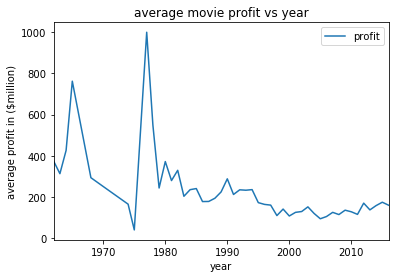

In [12]:
years = []
profit = []
std = []
score = []
budget = []
# divide all records into groups by their year
year_groups = df.groupby('year')

#use the np library to calculate the mean and standard deviation for 
# all the teams in each year#
for year, y in year_groups:
    profit.append(np.mean(y['profit']))
    years.append(year)
    std.append(np.std(y['profit']))
    score.append(np.mean(y['vote_average']))
    
#combine them together into a new dataframe, then plot the graph#
d2 = pd.DataFrame({'year' : years, 'profit' : profit, 'std' : std})
ax = d2.plot(x = 'year', y = 'profit')
plt.ylabel('average profit in ($million)')
plt.title('average movie profit vs year')
plt.show()

The time series graph above shows the trends of the average profit of each movie from 
1960s. We can see the average profit is slightly decreasing from 1980 to 2000. There is no significant change from 2000 to 2017. 

## Discovering the relationshp between movie's score and other variables

Now let's go back to our topic. If we want to find out what elements make a movie more likely to be good, we need to know what elemnts can affect a movie's score. In other words, we need to find the independent variables for the movie's score. 

### Score vs Year 

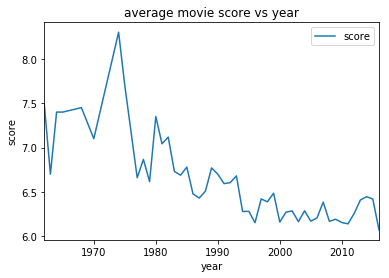

In [13]:
d3 = pd.DataFrame({'year' : years, 'score' : score, 'std' : std})
ax = d3.plot(x = 'year', y = 'score')
plt.ylabel('score')
plt.title('average movie score vs year')
plt.show()

The time series graph above shows how the average score of movies change every year. The average score decrease dramatically since mid 1970s. Until mid 1990s, this decreasing trend slows down but we can still see the average score for the movies after mid 1990s is lower than those before mid 1990s. Therefore, we can conclude that year could be one independent variable for movie score  

Average score is not always reliable. Meaning, it only works well when the data is fairly close to a normal distributuion. We want to do further reaserch to see if the year really matters. We define a movie to be considered as "good" if its score is greater than or equal to 7.0 . We use this standard to filter out data and store all the moives with scores over 7.0 in a new dataframe  
<br> Is average always reliable?: https://thelogicofscience.com/2016/10/10/basic-statistics-part-5-means-vs-medians-is-the-average-reliable/

In [14]:
year_over_7 = []
for index, row in df.iterrows():
    
    score = row['vote_average']
    year = row['year']
    if  float(score) >= 7:
        year_over_7.append(int(year))


Then we want to divide these records into 6 different periods, so that we have a nicer bar chart.

In [15]:
sixties = [f for f in year_over_7 if f >= 1960 and f < 1970 ]
seventies = [f for f in year_over_7 if f >= 1970 and f < 1980 ]
eighties = [f for f in year_over_7 if f >= 1980 and f < 1990 ]
nineties = [f for f in year_over_7 if f >= 1990 and f < 2000 ]
twenty1 = [f for f in year_over_7 if f >= 2000 and f < 2010 ]
twenty2 = [f for f in year_over_7 if f >= 2010  ] 

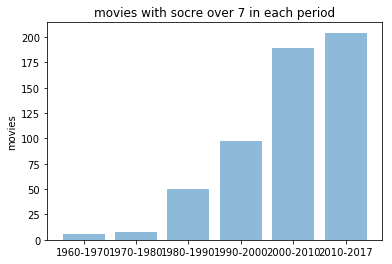

In [16]:
# set the number of movies as y axis, and periods as x axis
#plot the bar chart
periods = ('1960-1970', '1970-1980', '1980-1990', '1990-2000','2000-2010', '2010-2017')
y_pos = np.arange(len(periods))
counts = [len(sixties),len(seventies),len(eighties),len(nineties),len(twenty1),len(twenty2 )*10/7]
 
plt.bar(y_pos, counts, align='center', alpha=0.5)
plt.xticks(y_pos, periods)
plt.ylabel('movies')
plt.title('movies with socre over 7 in each period')
 
plt.show()

From the bar graph above, we can see there is an outbrust of good movies from the last two decades. Although the movies from these two decades does not have high average scores, we cannot deny the fact that we have more good movies produced in these two decades.    
<br>To understand why we have these two opposing results, we do one more thing, which is to plot the ratio of good movies in every decades

In [17]:
# we count the total number of movies in each decades 
# then store these numbers in lists 
rsixties = []
rseventies = []
reighties = []
rnineties = []
rtwenty1 = []
rtwenty2 = []

for index, row in df.iterrows():
    year = int(row['year'])
    if  year>= 1960 and year < 1970:
        rsixties.append(int(year))
    if  year>= 1970 and year < 1980:
        rseventies.append(int(year))
    if  year>= 1980 and year < 1990:
        reighties.append(int(year))
    if  year>= 1990 and year < 2000:
        rnineties.append(int(year))
    if  year>= 2000 and year < 2010:
        rtwenty1.append(int(year))
    if  year>= 2010:
        rtwenty2.append(int(year))

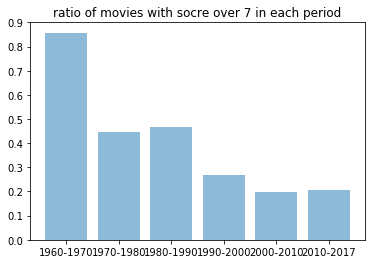

In [18]:
# ratio of good movies = (number of good movies) / (total number of movie production)
# plot the bar chart by using ratio of good movies as y axis and decades as x axis
periods = ('1960-1970', '1970-1980', '1980-1990', '1990-2000','2000-2010', '2010-2017')
y_pos = np.arange(len(periods))
counts = [len(sixties)/len(rsixties),len(seventies)/len(rseventies),len(eighties)/len(reighties),
          len(nineties)/len(rnineties),len(twenty1)/len(rtwenty1),len(twenty2 )/len(rtwenty2)]
 
plt.bar(y_pos, counts, align='center', alpha=0.5)
plt.xticks(y_pos, periods)

plt.title('ratio of movies with socre over 7 in each period')
 
plt.show()

The bar chart above shows that the ratio of good movies for last three decades are significantly lower than the first three. This result explains the phenomenon above well. At the begining of 1990s, there is a new time of numerous movie productions. In that era, plenty of good movies were produced but there were also a lot of movies produced at the same time that were not good. In conclusion, there are a lot of good movies produced in the last two decades. However, if you are looking at the movies before 1990, you are more likely to find a good movie randomly.    

### Score vs Budget

Unlike year, budget seems more like a concrete independent variable. A greater budget provided a movie with a better cast and a better visual effects team. We are going to make a scatter plot, which shows the score and budget of each movie. 

#### Scatter Plot 

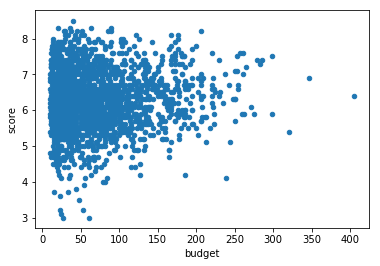

In [19]:
# we use lists to store the budget, score and profit for each movie
# then combines these values into a dataframe
budget = []
score = []
profit = []
for index, row in df.iterrows():
    profit.append(row['profit'])
    score.append(row['vote_average'])
    budget.append(row['budget'])


d4 = pd.DataFrame({'score' : score, 'budget' : budget})
ax = d4.plot.scatter(x = 'budget', y = 'score')
plt.ylabel('score')
plt.show()

The scatter plot above shows that most movies have a budget less than 100 million dollars. For the movies with budget less than 100 million dollars, their score varies from low to high. Although the movies with greater budget seem to have higher scores, a movie with low budget does not mean it is bad. 

#### Linear Regression 

Linear regression is a good way to find the relationship between two variables. We set the movie score as y axis and the amount of budget as x axis. Then we use the linear model from the library called sklearn to do the linear regression. Sklearn is a simple and efficient library for machine learning in python, for more  information: http://scikit-learn.org/stable/   

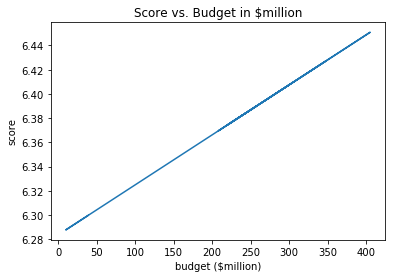

Coefficient: [[ 0.00041306]]


In [20]:
from sklearn import linear_model
import statsmodels.api as sm
import statsmodels.formula.api as smf

regression = linear_model.LinearRegression()
reg_2= smf.ols('score ~ budget', data = d4).fit()

# Convert arrays of year and life expectancy into a vectors. 
lifeExp = np.transpose([d4['score'].tolist()])
year = np.transpose([d4['budget'].tolist()])

# do the regression by using year as independent variable and
# life expectancy as dependent variable
regression = regression.fit(year,lifeExp)
plt.plot(year, regression.predict(year))
plt.title('Score vs. Budget in $million')
plt.ylabel('score')
plt.xlabel('budget ($million)')
plt.show()

print('Coefficient:', regression.coef_)

This graph show the relationship between budget and score. The coefficient is positive, which means a movie with greater budget will have higher score in this model. However, this linear model has a high intercept and low coefficient, which means their relationship here is very weak.  

### Genres vs Score

The last variable we are going to analyze is genre. We create a new data frame to store the average score for each genre and use a bar chart to compare them. 

In [21]:
i = 0
values = []
for idx, row in df.iterrows():
    genres_val = row['genres']
    if len(genres_val)>0 and not pd.isnull(row['vote_average']):
        for genre in genres_val:
            values.append([genre, row['vote_average']])    
        
subset_data1 = pd.DataFrame(values, columns=['genre','score'])
subset_data2 = subset_data1.groupby(['genre'], as_index=False).mean()
subset_data2 = subset_data2.sort_values('score')

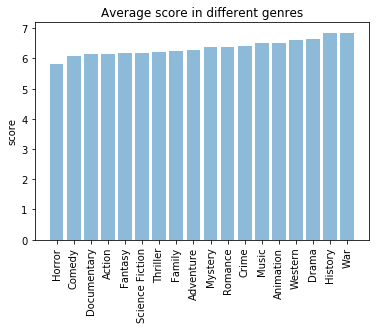

In [22]:
genres = subset_data2['genre']
y_pos = np.arange(len(genres))
plt.bar(y_pos, subset_data2['score'], align='center', alpha=0.5)
plt.xticks(y_pos, genres,rotation='vertical')
plt.ylabel('score')
plt.title('Average score in different genres')
plt.figure(figsize=(40,5)) 
plt.show()

The bar chart above shows the average scores for different genres from low to high. War and history movies have higher average score compared to other genres, and horror movies have the lowest. If someone asks you to watch a horror movie with him/her, don't expect it to be great. 
<br> Here is an interesting analysis of Why don’t most horror movies get good IMDB ratings?  
<br>https://www.quora.com/Why-don%E2%80%99t-most-horror-movies-get-good-IMDB-ratings

# IV. Analysis and ML

What we have done uptil here is only analysis. We know what factor a movie's score depends on but we don't know what mathmatical relationship exists between them.
<br>In this part we are going to do the most exciting thing. We are going to use the machine learning algortihm to build a perdicting model.

## What is machine learning

The first question we need to ask is "What is machine learning?". Definiton from SAS is: "Machine learning is a method of data analysis that automates analytical model building. It is a branch of artificial intelligence based on the idea that machines should be able to learn and adapt through experience." In our case, we give the machine learning algorithm our training data, which is the movie dataset. Machine Learning algorithm will give us a perdicting model in return. With the perdicting model, we can easily predict a movie's score from its property such as year, budget and runtime.
<bar>
<br>More information for Machine Learnign: https://www.sas.com/en_us/insights/analytics/machine-learning.html

In [23]:
# we choose the sklearn library
from pandas.stats.api import ols
import statsmodels.formula.api as sm
from sklearn import feature_selection
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import r2_score

## Multivariate Linear Model

In [36]:
#make sure all incorrect values in the dataset is swept
new_data = df.dropna()
#use the dataframe in part one and choose vote_average as dependent variable
# year, budget, and runtime as independent variables
ols = sm.ols(formula = "vote_average ~year + budget + runtime", data = new_data).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:           vote_average   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     209.7
Date:                Sat, 16 Dec 2017   Prob (F-statistic):          3.05e-119
Time:                        03:28:48   Log-Likelihood:                -2323.2
No. Observations:                2147   AIC:                             4654.
Df Residuals:                    2143   BIC:                             4677.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.6031      3.750      3.627      0.0

To understand the Regression result, we need to look at the coef and p-value for each variable. coef is the estimated value of the coefficient. P>|t| is used to decide if the null-hypothesis is ture. If it is lower than the confidence level, often 0.05, it indicates that there is a statistically significant relationship between the term and the response.
<br>In our result, budget and runtime have 0.000 as p-values which means they are both significantly related to the movie's score. Budget and runtime are linearly related to the movie's score by their coefficients.   
<br>
<br> For deeper understand:https://www.datarobot.com/blog/ordinary-least-squares-in-python/  

## Using multivariate linear model to perdict profit 

We can also play with multivariate linear model by picking year, budget, score, runtime to perdict a movie's profit

In [37]:
ols = sm.ols(formula = "profit ~year + budget+ score + runtime", data = new_data).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     214.4
Date:                Sat, 16 Dec 2017   Prob (F-statistic):          7.67e-155
Time:                        03:59:47   Log-Likelihood:                -14429.
No. Observations:                2147   AIC:                         2.887e+04
Df Residuals:                    2142   BIC:                         2.890e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4598.3475   1057.310      4.349      0.0

## Decision Tree Classifier 

_Definition_: "Decision Tree Classifier is a simple and widely used classification technique. It applies a straitforward idea to solve the classification problem. Decision Tree Classifier poses a series of carefully crafted questions about the attributes of the test record. Each time it receives an answer, a follow-up question is asked until a conclusion about the class label of the record is reached." from http://mines.humanoriented.com
<br>
<br> A Decision Tree Classifier introduction: https://medium.com/machine-learning-101/chapter-3-decision-trees-theory-e7398adac567

In [38]:
# train a decision tree classifier on our data 
x_columns = ['year','budget','runtime','profit']
y_column = 'vote_average'


x = [list(row.values) for _, row in new_data[x_columns].iterrows()]
y = new_data[y_column].values

X_train, X_val, y_train, y_val = train_test_split(x, y, test_size = 0.2)

classifier = tree.DecisionTreeRegressor(min_samples_split=3)

In [39]:
# use r-sqared score to test if this model fit our data well
y_pred = classifier.fit(X_train, y_train).predict(X_val)

r2 = r2_score(y_val, y_pred)
r2

-0.38598454168884389

R-squared measures how close the data is to the fitted. Our model has a low R-squared, which means this model does not fit the data well. This model does not work for our data.

## Logistic Regression

"Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable." from towardsdatascience.com
<br>
<br> In our case, the categorical dependent variable is the movie's genre. We want to make a logistic regression model to perdict if a movie is good(score over 7.0) by genre.
<br>
<br>An intresting example: https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8  

In [27]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

The first thing we need to do is converting the type of genres from a list of strings to binary values( 1 and 0) so it is accessible for the logistic regression algorithm.

In [40]:
action = []
adventure = []
scifi = []
fantasy = []
crime = []
drama = []
thriller = []
animation = []
family = []
western = []
comedy = []
romance = []
horror = []
mystery = []
history = []
war = []
music = []
documentary = []
score_over7 = []
for index, row in df.iterrows():
    
    if row['vote_average'] >= 7:
        score_over7.append(1)
    else:
        score_over7.append(0)
        
    if 'Action' in row['genres'] :
        action.append(1)
    else:
        action.append(0)
    if 'Adventure' in row['genres'] :
        adventure.append(1)
    else:
        adventure.append(0)
    if 'Science Fiction' in row['genres'] :
        scifi.append(1)
    else:
        scifi.append(0)    
    if 'Fantasy' in row['genres'] :
        fantasy.append(1)
    else:
        fantasy.append(0)    
    if 'Crime' in row['genres'] :
        crime.append(1)
    else:
        crime.append(0)    
    if  'Drama' in row['genres'] :
        drama.append(1)
    else:
        drama.append(0)
    if  'Thriller' in row['genres'] :
        thriller.append(1)
    else:
        thriller.append(0)
    if  'Animation' in row['genres'] :
        animation.append(1)
    else:
        animation.append(0)
    if  'Family' in row['genres'] :
        family.append(1)
    else:
        family.append(0)
    if  'Western' in row['genres'] :
        western.append(1)
    else:
        western.append(0)
    if  'Comedy' in row['genres'] :
        comedy.append(1)
    else:
        comedy.append(0)
    if  'Romance' in row['genres'] :
        romance.append(1)
    else:
        romance.append(0)
    if  'Horror' in row['genres'] :
        horror.append(1)
    else:
        horror.append(0)
    if  'Mystery' in row['genres'] :
        mystery.append(1)
    else:
        mystery.append(0)
    if  'History' in row['genres'] :
        history.append(1)
    else:
        history.append(0)
    if  'War' in row['genres'] :
        war.append(1)
    else:
        war.append(0)
    if  'Music' in row['genres'] :
        music.append(1)
    else:
        music.append(0)
    if  'Documentary' in row['genres'] :
        documentary.append(1)
    else:
        documentary.append(0)
# create a new data frame to store the binary values for each genres
new_data = {'Action':action, 'Adventure':adventure, 'Fantasy':fantasy, 'Science Fiction':scifi, 'Crime':crime,
       'Drama':drama, 'Thriller':thriller, 'Animation':animation, 'Family':family, 'Western':western, 'Comedy':comedy,
       'Romance':romance, 'Horror':horror, 'Mystery':mystery, 'History':history, 'War':war, 'Music':music,
       'Documentary':documentary}

df2 = pd.DataFrame(new_data, columns=['Action', 'Adventure', 'Fantasy', 'Science Fiction', 'Crime',
       'Drama', 'Thriller', 'Animation', 'Family', 'Western', 'Comedy',
       'Romance', 'Horror', 'Mystery', 'History', 'War', 'Music',
       'Documentary'])
df2.head()

,Action,Adventure,Fantasy,Science Fiction,Crime,Drama,Thriller,Animation,Family,Western,Comedy,Romance,Horror,Mystery,History,War,Music,Documentary
0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [41]:
x = df2.columns
y = score_over7
x = df2[x]
y = score_over7

In [42]:
logit = sm.Logit(y,x )
result = logit.fit()
print (result.summary())

Optimization terminated successfully.
         Current function value: 0.477262
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 2147
Model:                          Logit   Df Residuals:                     2129
Method:                           MLE   Df Model:                           17
Date:                Sat, 16 Dec 2017   Pseudo R-squ.:                  0.1142
Time:                        04:35:44   Log-Likelihood:                -1024.7
converged:                       True   LL-Null:                       -1156.8
                                        LLR p-value:                 2.440e-46
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Action             -0.8864      0.142     -6.255      0.000      -1.164      -0.609
Adventure     

The result of logistic regression is shown above. Similar to the result of linear regression, variable with P>|z| lower than 0.05 has a statistically significant relationship with the movie score.
<br>Action, Drama, Thriller, Comedy and Horror have p-value less than 0.05 and they all have negative coefficients except Drama. This means a movie in these genres are less possible to be considered as good. Any thriller, horror and comedy are less likely to be good.     

### Accuracy and Cross Validation

In [44]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [32]:
# Predicting the test set results and calculating the accuracy
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.75


In [33]:
#We are using 10-fold Cross-Validation to train our Logistic Regression model.
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.771


"Cross validation attempts to avoid overfitting while still producing a prediction for each observation dataset. We are using 10-fold Cross-Validation to train our Logistic Regression model." from towardsdatascience.com
<br> The average accuracy is very close to the logistic regression model, we are confident that our model works well

# Conclusion

We are now able to answer the question "How to predict a good movie by not looking at the ratings?". To perdict a movie's rating, we can use the multivariate linear model with a movie's budget at runtime and using logistic regression with the movie's genres. If you don't have a computer for this calculation, just remember to expect less from a horror, thriller or comedy movie. 